# Lab01 
### TDS3651 Visual Information Processing


This lab introduces some basic input/output mechanisms for handling images, and some fundamental image processing operations such as arithmetic operations, point-based processing and image histogram manipulation. This lab is primarily guided (in many portions) while it also contains sections that you are require to complete. 

## Image Libraries for Python

The two most popularly used libraries for processing images and videos in the Python environment is the **Python Imaging Library (PIL)** and **OpenCV**. We will be mainly using the OpenCV in most labs (as it is the richer of the two in terms of functionalities for image processing and computer vision), although some exposure to PIL is also helpful and might come in handy at times.

PIL has an online [handbook](http://effbot.org/imagingbook/pil-index.htm) which is easy to use. OpenCV (for Python) does not have a proper documentation for version 3.1.0, but you can find the [complete one for C++](http://docs.opencv.org/3.1.0/index.html). However, OpenCV does have a very comprehensive bunch of Python tutorials which you can find [here](http://docs.opencv.org/3.1.0/d6/d00/tutorial_py_root.html). Due to some syntax differences between the C++ and Python versions, you can use the function `help(function-name)` and the C++ OpenCV reference to cross-check it usages.


### Before starting

- First, ensure that you have got OpenCV 3.1.0 installed for Python. The easiest way is to install the `opencv3` package through `conda` from the `menpo` channel. At command prompt: `conda install -c menpo opencv3=3.1.0`. PIL package comes together with Anaconda. 
- Get the imagepack provided for this lab. Place the images in the same folder as the notebook (for ease) of any other folders of your choice.
- Check if your OpenCV is properly installed

In [1]:
import cv2
cv2.__version__

'3.1.0'

## Image Handling 

Using PIL and OpenCV to read an image


In [142]:
import numpy as np
img = cv2.imread('opencv-logo.png')                              # IMREAD always reads an RGB image in B-G-R order (reversed)
img_gray = cv2.imread('opencv-logo.png',cv2.IMREAD_GRAYSCALE)    # read image directly as grayscale

We can verify if the two images are correctly read by checking its dimension from the variable list,

In [9]:
whos

Variable   Type       Data/Info
-------------------------------
cv2        module     <module 'cv2' from 'C:\\U<...>\cv2.cp35-win_amd64.pyd'>
img        ndarray    600x600x3: 1080000 elems, type `uint8`, 1080000 bytes (1.02996826171875 Mb)
img_gray   ndarray    600x600: 360000 elems, type `uint8`, 360000 bytes (351.5625 kb)
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>


In [112]:
print(type(img))

<class 'numpy.ndarray'>


And also by displaying them.

In [71]:
cv2.imshow('Color image',img)
cv2.imshow('Grayscale image',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Now, let's save the grayscale image as a file to disk. After that, check if you can find the newly saved image file.

In [15]:
cv2.imwrite('opencv-gray.png',img_gray)

True

### Matplotlib

Matplotlib is a plotting library for Python which gives you wide variety of plotting methods. Here, you will learn how to display image with Matplotlib. With Matplotlib, you can also display interactive plots which can zoom in and out of images, save and etc, using the additional line `%matplotlib %notebook`. In this new Jupyter, all plots are plotted inline (in the notebook) by default.

<class 'numpy.ndarray'>


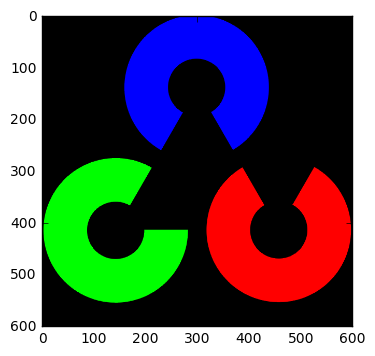

In [144]:
from matplotlib import pyplot as plt
# adding the line below enables interactive plots 
# %matplotlib inline   

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # is a good idea to convert BGR to RGB as matplotlib uses RGB
print(type(img))
plt.imshow(img)
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Have a look at more plotting styles and features from [this documentation](http://matplotlib.org/api/pyplot_api.html). Try out some if you wish.

### Basic Operations


Next, let's look at some basic image operations that will come in handy later.

You can access a pixel value by its row and column coordinates. OpenCV uses "BGR" instead of "RGB". (For the long story, you can read [here](https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/) why is it so). For BGR image, it returns an array of Blue, Green, Red values, respectively. For grayscale image, it is straightforward; the corresponding intensity is returned.

In [116]:
# accessing a location at the blue region of the logo
imgTemp = img[:]
# print(imgTemp)

px = img[500, 400]
print(px)

# accessing only the blue pixel at that same location
blue = img[500, 400, 2]
print(blue)

[  0   0 255]
255


These pixel intensity values can be modified by assigning a new colour to it. Let's modify that same pixel to white colour, and then, try changing more pixels at one go (using numpy slicing).

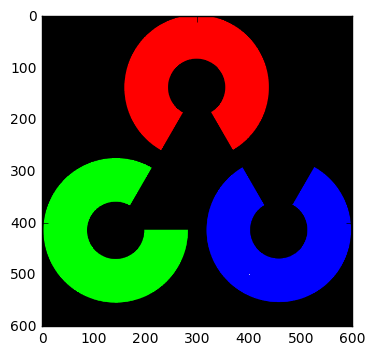

In [118]:
# Change pixel colour to white
img[500, 400] = [255, 255, 255]
plt.imshow(img)
# plt.xticks([]), plt.yticks([])  
plt.show()      # can you see the white dot? :)

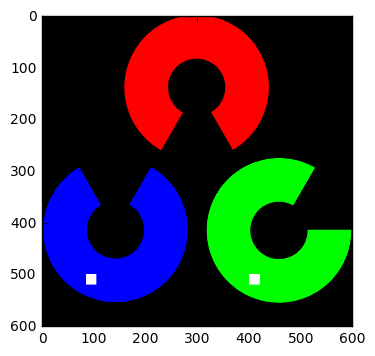

In [139]:
# Change a larger patch of pixels (20x20 in size), all to white
img[500:520, 400:420] = [255, 255, 255]
plt.imshow(img)
# plt.xticks([]), plt.yticks([])  
plt.show() 

Alternatively, for individual pixel access and modification, Numpy array methods, `array.item()` and `array.itemset()` can also be used. 

**Q**: Figure out yourself how they can be used.

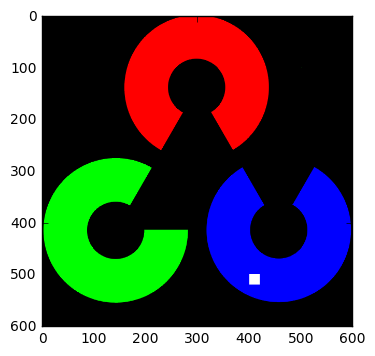

In [131]:
#array.item() 
imgTemp.item((100, 500, 1))
#array.itemset()
imgTemp.itemset((100,500,1), 100)
plt.imshow(imgTemp)
plt.show()

There are other Numpy methods that are help to find image properties. 

The "shape" of image is accessed by img.shape *(I personally prefer to call it 'size' of the image, but perhaps they want to be generic when identifying n-dimensional arrays.)* `img.shape` returns a tuple of number of rows, columns and channels (if image is color). Image datatype is obtained by `img.dtype` while the total number of pixels can be accessed by `img.size` 

**Q**: What is the actual size of the data (in bytes) that's residing in the memory?

In [132]:
print(img.shape)
print(img.size)
print(img.dtype)

(600, 600, 3)
1080000
uint8


Note: `img.dtype` is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.

Of course, it's easy to just use `whos` to display all these properties (but all variables in memory are shown).

In [133]:
whos

Variable   Type       Data/Info
-------------------------------
blue       uint8      255
cv2        module     <module 'cv2' from 'C:\\U<...>\cv2.cp35-win_amd64.pyd'>
img        ndarray    600x600x3: 1080000 elems, type `uint8`, 1080000 bytes (1.02996826171875 Mb)
imgTemp    ndarray    600x600x3: 1080000 elems, type `uint8`, 1080000 bytes (1.02996826171875 Mb)
img_gray   ndarray    600x600: 360000 elems, type `uint8`, 360000 bytes (351.5625 kb)
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
px         ndarray    3: 3 elems, type `uint8`, 3 bytes


Before we proceed further, let's put the image displaying codes into a function definition, so that we can just call it with a single function call from hereon

In [135]:
def showImage(img, titlestr="" ):
    plt.imshow(img)
#     plt.xticks([]), plt.yticks([])  
    plt.title(titlestr)
    plt.show() 

### Image ROI


A Region-of-Interest (ROI) refers to a certain sub-part or region of the image that you wish to process. Let's try to cut a ROI from the logo image and swap it with another ROI within the image!

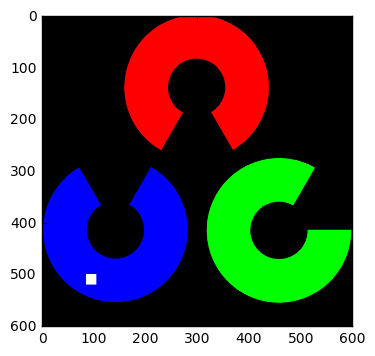

In [136]:
# redROI = img[272:600, 315:600]               # this slicing merely takes a 'view' into the same data, no copies made
redROI = img[272:600, 315:600].copy()          # enables deep copy --> make another copy elsewhere in memory
img[272:600, 315:600] = img[272:600, 0:285];
img[272:600, 0:285] = redROI 
showImage(img)

### Splitting/Merging Image Channels


If you need to work separately on the individual B, G, or R channels of a color image, then you need to split the BGR images to single planes. You can also join these individual channels back to a BGR image.

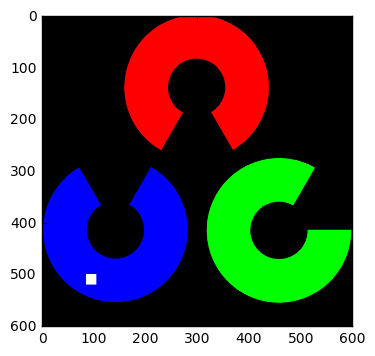

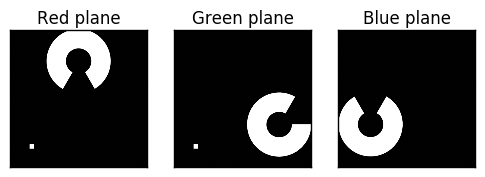

In [137]:
# splitting colorspace into 3 distinct channels
r,g,b = cv2.split(img)              
img = cv2.merge((r,g,b))
showImage(img)

# Another function for setting subplot images --> Note: plt.show() only called after all subplots defined
def showSubplotImage(img, titlestr=""):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  
    plt.title(titlestr)

# Creating 3 subplots (in 1 row) to show the 3 planes for each colour channel
fig = plt.subplots(nrows=1, ncols=3)
plt.subplot(131), showSubplotImage(r, 'Red plane')
plt.subplot(132), showSubplotImage(g, 'Green plane')
plt.subplot(133), showSubplotImage(b, 'Blue plane')
plt.show()

## Arithmetic Operations on Images

Image addition in OpenCV is pretty easy. Intuitively, the `+` sign should suffice in performing this operation. Let's try adding two images together...

In [161]:
#NOTE: ACTUALLY! there is a difference in dimension between a gray-converted image and reading a "gray" image from file system.
#Gray Converted  : 2 channels only
#Read Gray image : 3 channels! It appears to be a RGB image with same color pixel values at respective locations 
print(img_gray.shape)
img_ml = cv2.imread('ml.png')
added = img_gray + img_ml

(600, 600)


ValueError: operands could not be broadcast together with shapes (600,600) (397,344,3) 

This is not possible because you cannot add two arrays that are of different dimensions! So let's resize one of the two images to follow the other.

In [162]:
dim = (344, 397)
opencv_resized = cv2.resize(img, dim)
opencv_resized.shape

# personal testing on gray image's dimensionality
imgtestingA = cv2.imread('opencv-gray.png')
imgtestingA.shape

(600, 600, 3)

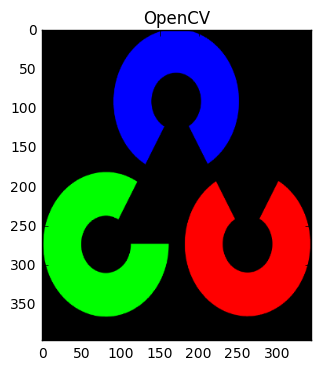

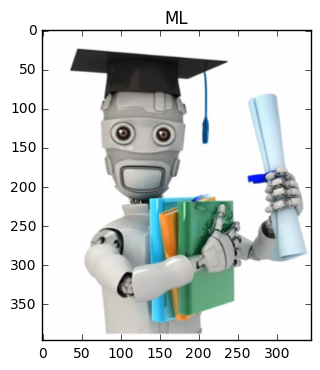

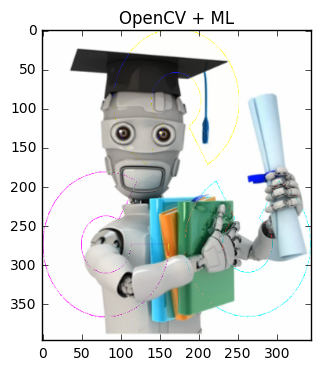

In [163]:
added = opencv_resized + img_ml
showImage(opencv_resized, 'OpenCV')
showImage(img_ml, 'ML')
showImage(added, 'OpenCV + ML')

Something not quite right still! The added image does not seemed to be correctly blended. This is because Numpy addition `+` can easily result in an overflow of the `uint8` range. Try this:

In [164]:
x = np.uint8([250])
y = np.uint8([10])
print(x + y)    # this is 250 + 10 = 260 % 256 = 4        When it overflows pass 256, the added values start over again...

[4]


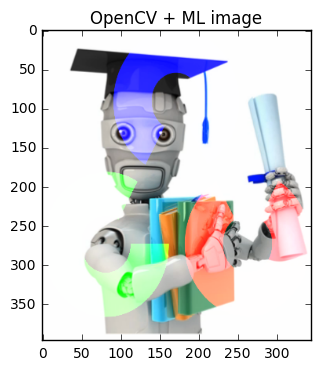

In [165]:
added2 = cv2.add(img_ml, opencv_resized)
showImage(added2, 'OpenCV + ML image')

To have more control over how much each of the two images can be blended together, try the function `cv2.addWeighted`.

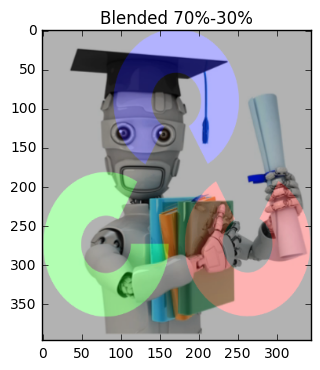

In [166]:
blended = cv2.addWeighted(img_ml,0.7,opencv_resized,0.3,0)     # 70% of ML image, 30% of OpenCV image
showImage(blended, 'Blended 70%-30%')

How about subtracting two images? Are there any negative values after doing this?

What if we find the absolute difference between two images instead?

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ..., 
 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


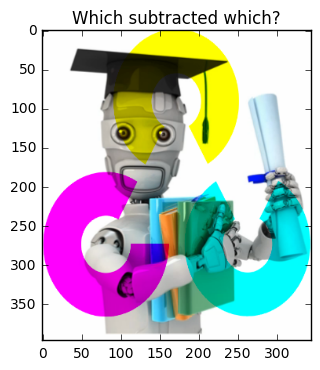

In [170]:
subtracted = cv2.subtract(img_ml, opencv_resized)       # which subtracted which?
print(subtracted)
showImage (subtracted, 'Which subtracted which?')


[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ..., 
 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ..., 
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


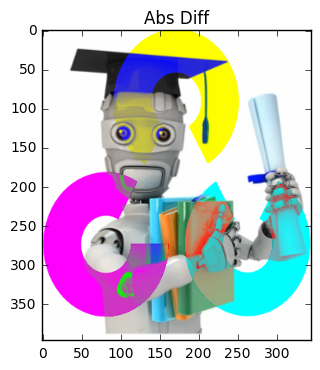

In [169]:
absdifferenced = cv2.absdiff(img_ml, opencv_resized)
print(absdifferenced)
showImage (absdifferenced, 'Abs Diff')

## Histograms

An image histogram is typically a graphical plot that shows the frequency of occurrence (or distribution) of intensity levels in an image *(Note: Later, we will learn that histograms are simply a vector of count values that can be used for more higher-level tasks like representation and description.)* Two concepts are most important in a histogram:
- BINS: the number of compartments we wish to use to group the intensity values into. Typically, we just use a bin for every intensity value (hence, 256 bins in total), or we can also use larger bins that can take a range of values, i.e. 16 bins for each 16 intensity values.
- RANGE: the range of intensity values that you want to measure. Normally it's [0, 256]

There are two functions that can be used to calculate histograms (one from OpenCV, the other from Numpy). Check out the documentation to find out more about the input parameters for [`cv2.calcHist`](http://docs.opencv.org/3.1.0/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d) and [`np.histogram`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html).

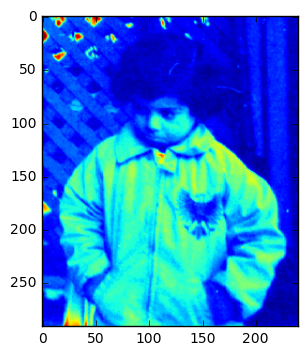

In [213]:
pout = cv2.imread('pout.png', cv2.IMREAD_GRAYSCALE)
hist0 = cv2.calcHist([pout],[0],None,[256],[0,256])    # using OpenCV function
hist,bins = np.histogram(pout.ravel(),256,[0,256])          # using Numpy function
showImage(pout)
# cv2.waitKey(0)

*Note: OpenCV function is faster (around 40x) than np.histogram(). So stick with OpenCV function. :)*

There are two ways to plot the histogram -- using Matplotlib and using OpenCV drawing functions. We will stick to using Matplotlib as it is more straightforward.

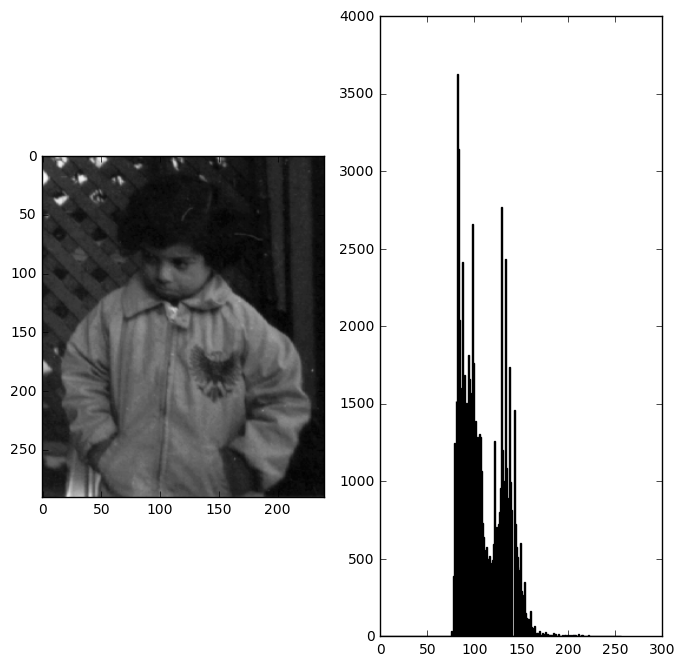

In [173]:
# Using matplotlib
plt.figure(figsize=(8,8))
plt.subplot(121), plt.imshow(pout, cmap='gray')
plt.subplot(122), plt.hist(pout.ravel(),256,[0,256]); 
plt.show()

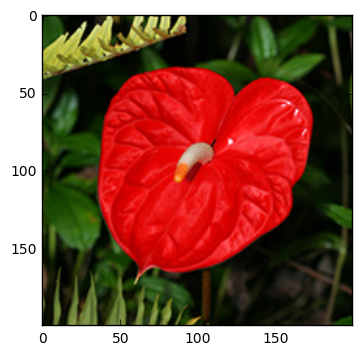

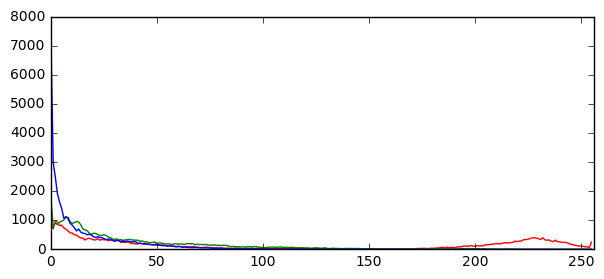

In [180]:
# Using OpenCV
rf = cv2.imread('redflower.jpg')
rf = cv2.cvtColor(rf, cv2.COLOR_BGR2RGB)  
showImage(rf)
plt.figure(figsize=(7,3))
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([rf],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Noticed how the individual red, green and blue channels are distributed across the intensity values?
Tinker with the number of bins to make more observations.

### Histogram Equalization

Histogram equalization attemps to improve the distribution of intensity values in an image by equalizing or "flattening" the histogram as much as possible. 

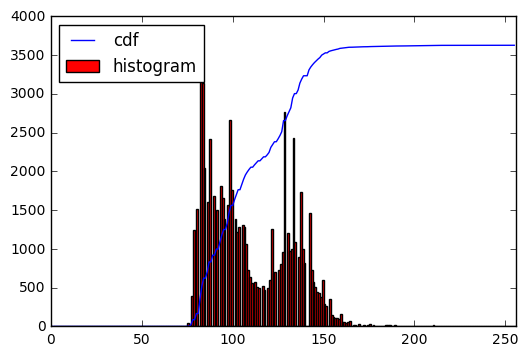

In [181]:
hist,bins = np.histogram(pout.flatten(),256,[0,256])

# this finds the cdf of the histogram 
cdf = hist.cumsum()      

cdf_normalized = cdf * hist.max()/ cdf.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(pout.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

You can see that the histogram lies a narrow middle range. We need it to occupy the full spectrum. In pixel- or point-based image transformation, we need a transformation function which spreads out the current pixels in the middle range to both ends of the spectrum. That is what histogram equalization can do.

Now, find the minimum histogram value (excluding 0) and apply a simple scaling of the CDF values back to the standard intensity range of [0, 255]. In theory, we normalize the CDF to [0, 1] before multiplying with the maximum of the range (L-1), which is 255. They will get us the same thing.

The concept of a masked array from Numpy is used here, that is, all operations are performed on non-masked elements. You can read more about it from Numpy docs on [masked arrays](https://docs.scipy.org/doc/numpy/reference/maskedarray.html).

In [205]:
cdf_m = np.ma.masked_equal(cdf,0)
# print(cdf)
cdf_m = np.round((cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())*255)     # discretize back the CDF values to [0, 255]
# print(cdf_m)

new_cdf = np.ma.filled(cdf_m,0).astype('uint8')
# print(new_cdf)

# this does the mapping -- using the scaled cdf to look for the new intensity values
pout2 = new_cdf[pout]   
# print(pout2)

Use again the earlier code to draw the histogram and cdf plot together. Observe what happens to both the histogram and cdf plot. 

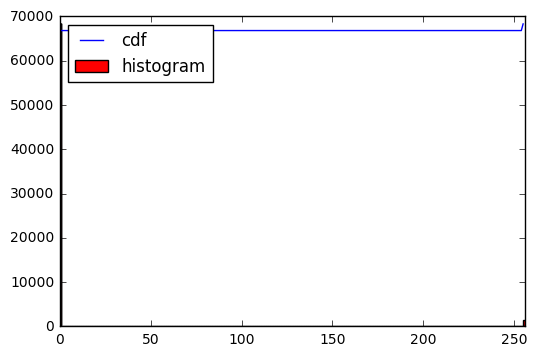

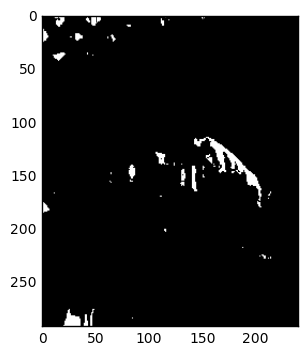

In [203]:
hist2,bins = np.histogram(pout2.flatten(),256,[0,256])

cdf2 = hist2.cumsum()

cdf_normalized = cdf2 * hist2.max()/ cdf2.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(pout2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(pout2, cmap='gray'); plt.show()

In [202]:
cdf_m = np.ma.masked_equal(cdf2,0)
# print(cdf)
cdf_m = np.round((cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())*255)     # discretize back the CDF values to [0, 255]
# print(cdf_m)

new_cdf = np.ma.filled(cdf_m,0).astype('uint8')
# print(new_cdf)

# this does the mapping -- using the scaled cdf to look for the new intensity values
pout2 = new_cdf[pout]   
# print(pout2)

**Q**: What happens if you perform histogram equalization one more time?

## Using Spyder

Ultimately, some people may find using Jupyter notebooks a hassle when they need to re-run big portions of code (including some earlier code as well), but of course some may not if they know how to utilize nifty options from the "Cell" menu item. If you do, you can try using Spyder, which is a typical IDE that gives you better control in writing programs.

Just to be familiarized with it, transfer the necessary code for **histogram equalization** from this tutorial to Spyder (create new .py file, run), and get it working. Writing codes over there gives you a better view of what code can be further modularized into functions. If you ever need to test out short snippets of code over there, the iPython console is visible there as well.

## Additional Exercises


Q1. Perform point-based processing on the "pout" image using the following transformation functions:

1. $$ y = 2x$$
2. $$ y = x/2$$
3. $$ y = x^2$$

Observe and comment on the outcome of performing these transformations


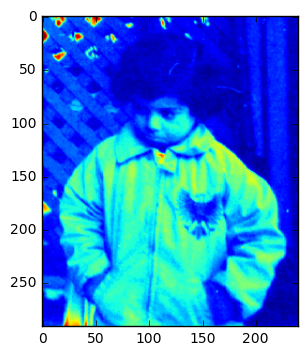

In [208]:
plt.imshow(pout)

# y = 2x
def firstFunction():
    
    
# y = x/2
def secondFunction():
    
# y = x^2
def thirdFunction():
    

Q2. Create a montage of images that capture the smooth transition between two images blended using the weighted addition function `cv2.addWeighted`.

Q3. Write a handy function that can show multiple images in a single figure using the `subplot` function.